# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import ArrayLike

# Definitions

In [3]:
def FR_Nf(t:ArrayLike, N:int, ctr:tuple, sing:tuple|None=None):
    """
    Compute the N-term partial sum of a Fourier series at points `t`.

    Parameters
    ----------
    t : array_like
        Points where the partial sum is evaluated. Any numpy-compatible
        1D array-like (e.g. numpy.ndarray) is accepted. 
    N : int
        Number of harmonics to include (terms 1..N). Should be non-negative.
        If N == 0 the function returns the constant a0/2.
    ctr : tuple (a0, an, bn)
        a0 : scalar
            The Fourier coefficient as n=0.
        an : callable
            Function or callable that accepts an integer `n` and returns the
            coefficient a_n (scalar).
        bn : callable
            Function or callable that accepts an integer `n` and returns the
            coefficient b_n (scalar).
    sing : tuple (index, a_index, b_index) or None, optional
        Optional override for a single harmonic `index`. If provided, when
        n == index the coefficients a_index and b_index are used instead of
        an(index) and bn(index). This is useful when a_n or b_n formulas
        have a singularity at a specific `n`. If None (default), no override
        is applied.

    Returns
    -------
    numpy.ndarray
        Array with the same shape as `t` containing the partial sum values.

    Notes
    -----
    - The implementation uses the 2π-periodic basis cos(n*t), sin(n*t).
    - The `sing` override compares `n == index` using Python equality; ensure
      the `index` is an integer and matches the type used in the loop.
    """

    a0, an, bn = ctr

    if sing is None:
        def term(t, n): 
            return an(n)*np.cos(n*t) + bn(n)*np.sin(n*t)
    else:
        si, sa, sb = sing
        def term(t, n):
            if n == si:
                return sa*np.cos(si*t) + sb*np.sin(si*t)
            else:
                return an(n)*np.cos(n*t) + bn(n)*np.sin(n*t)
    
    res = a0/2 * np.ones_like(t)
    for i in range(1,N+1):
        res += term(t, i)

    return res

def plot(t,f,FR_Nf, ctr, sing=None, plot_range=range(0,10,2)):
    fig, ax = plt.subplots(1,1, figsize=(6, 4))

    ax.plot(t, f(t), 'k-', linewidth=2, label='function')
    for ind in plot_range:
        ax.plot(t, FR_Nf(t, ind, ctr, sing), linewidth=1, label=f'n = {ind}')

    ax.set_ylabel(r'$f(t)$', fontsize=16)
    ax.set_xlabel(r'$t$', fontsize=16)
    ax.grid(True)
    ax.legend()
    plt.tight_layout()
    return fig

# Aufgabe 16

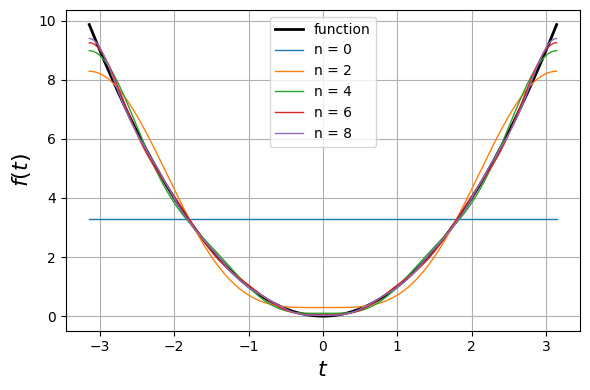

In [37]:
f = lambda t : t**2 

a0 = 2/3 * np.pi**2
an = lambda n : 4/n**2 * (-1)**n
bn = lambda n : 0

ctr = (a0, an, bn)

t = np.linspace(-np.pi, np.pi, 1000)
fig = plot(t, f, FR_Nf, ctr)

# Aufgabe 17

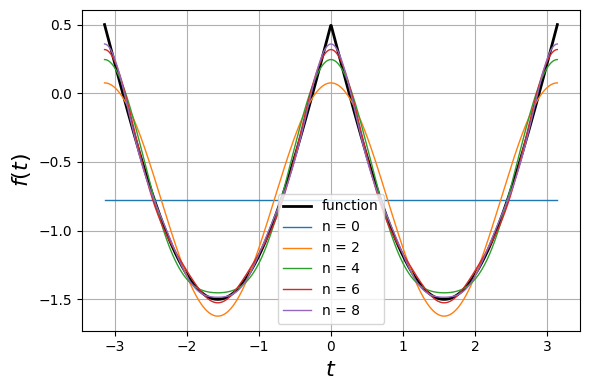

In [36]:
f = lambda t : 1/2 - 2*np.abs(np.sin(t))

a0 = 1- 8/np.pi
an = lambda n : np.where(n%2, 0, -8/np.pi* 1/(1-n**2))
bn = lambda n : 0 

ctr = (a0, an, bn)
sing = (1, 0, 0)

t = np.linspace(-np.pi, np.pi, 1000)
fig = plot(t, f, FR_Nf, ctr, sing)

# Aufgabe 18


## Punkt a

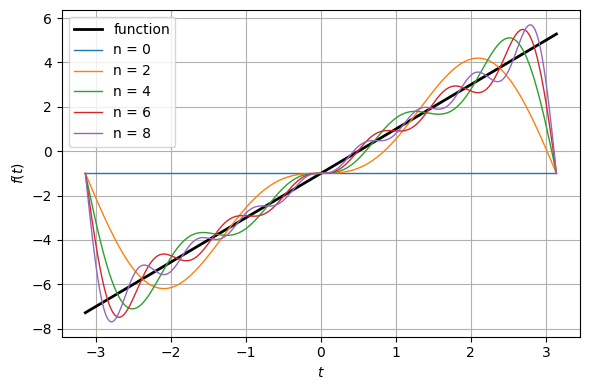

In [27]:
f = lambda t : 2*t - 1

a0 = -2
an = lambda n : 0
bn = lambda n : 4/n *(-1)**(n+1)

ctr = (a0, an, bn)

t = np.linspace(-np.pi, np.pi, 1000)
fig = plot(t, f, FR_Nf, ctr)

## Punkt b

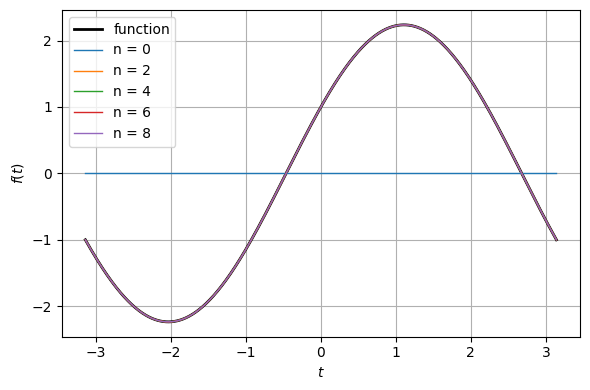

In [26]:
f = lambda t : np.cos(t) + 2*np.sin(t)

# ist schon Fourier Reihe mit
a0 = 0
a1 = 1
b1 = 2

an = lambda n : 0
bn = lambda n : 0

ctr = (a0, an, bn)
sing = (1, a1, b1)

t = np.linspace(-np.pi, np.pi, 1000)
fig = plot(t, f, FR_Nf, ctr, sing)

## Punkt c

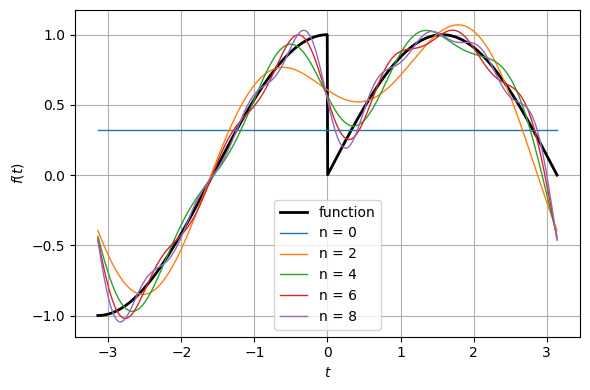

In [25]:
f = lambda t : np.where(t>0, np.sin(t), np.cos(t))

a0 = 2/np.pi
a1 = 0.5
an = lambda n : np.where(n%2, 0, 2/np.pi* 1/(1-n**2))

b1 = 0.5
bn = lambda n : np.where(n%2, 0, 2*n/np.pi* 1/(1- n**2))  

ctr = (a0, an, bn)
sing = (1, a1, b1)

t = np.linspace(-np.pi, np.pi, 1000)
fig = plot(t, f, FR_Nf, ctr, sing)

# Aufgabe 19

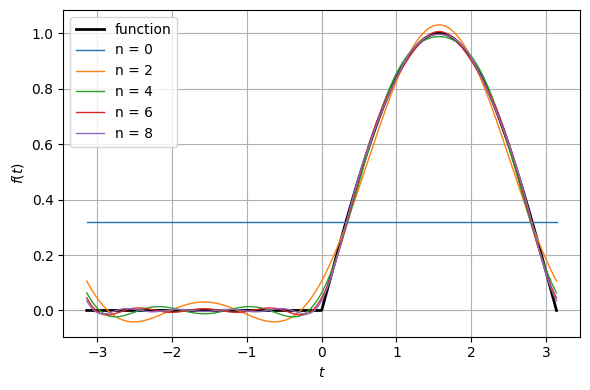

In [24]:
omega = 1

f = lambda t : np.where(t>0, np.sin(omega*t), 0)

a0 = 2/np.pi
a1 = 0
an = lambda n : np.where(n%2, 0, 2/np.pi* 1/(1-n**2))

b1 = 0.5
bn = lambda n : 0

ctr = (a0, an, bn)
sing = (1, a1, b1)

t = np.linspace(-np.pi/omega, np.pi/omega, 1000)
fig = plot(t, f, FR_Nf, ctr, sing)

# Aufagbe 20

## Plot Function

In [38]:
A = 3
B = 1
f = 1
fc = 20

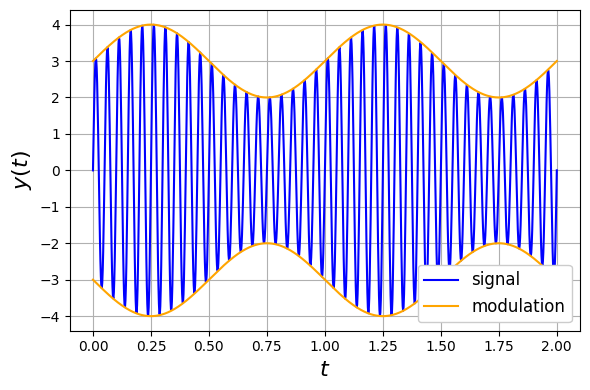

In [55]:
t = np.linspace(0, 2, 1000)

def y(t):
    x,v = 0,1
    amp = A + B*np.sin(2*np.pi*f*t)
    carrier = np.sin(2*np.pi*fc*(t-x/v))
    return amp, carrier
                                             
fig, ax = plt.subplots(1,1, figsize=(6, 4))
amp, carrier = y(t)
ax.plot(t, amp*carrier,'b-', label='signal')
ax.plot(t, amp,'-', color='orange', label='modulation')
ax.plot(t, -amp,'-', color='orange')
ax.set_ylabel(r'$y(t)$', fontsize=16)
ax.set_xlabel(r'$t$', fontsize=16)
ax.grid(True)
l = ax.legend(frameon=True, fontsize=12, loc='lower right')
l.get_frame().set_alpha(1.0)     
plt.tight_layout()